In [2]:
%load_ext autoreload
%autoreload 2
# %matplotlib widget

In [3]:
import xarray as xr
import numpy as np
import pandas as pd

import ecephys_analyses as ea 

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [4]:
xr.set_options(keep_attrs=True)

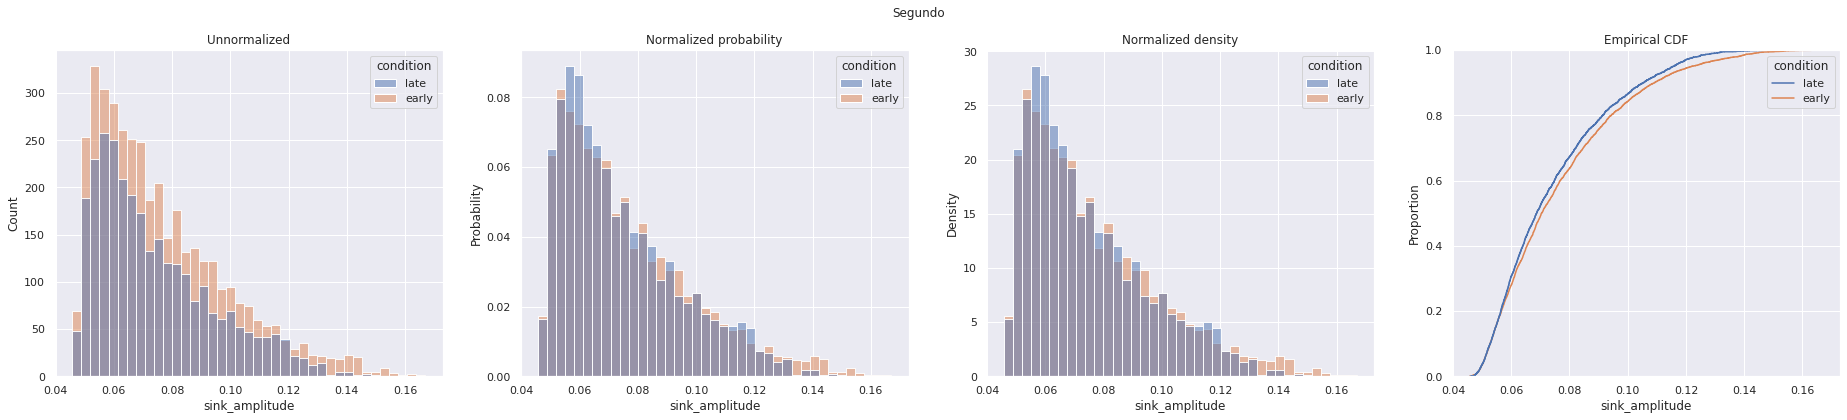

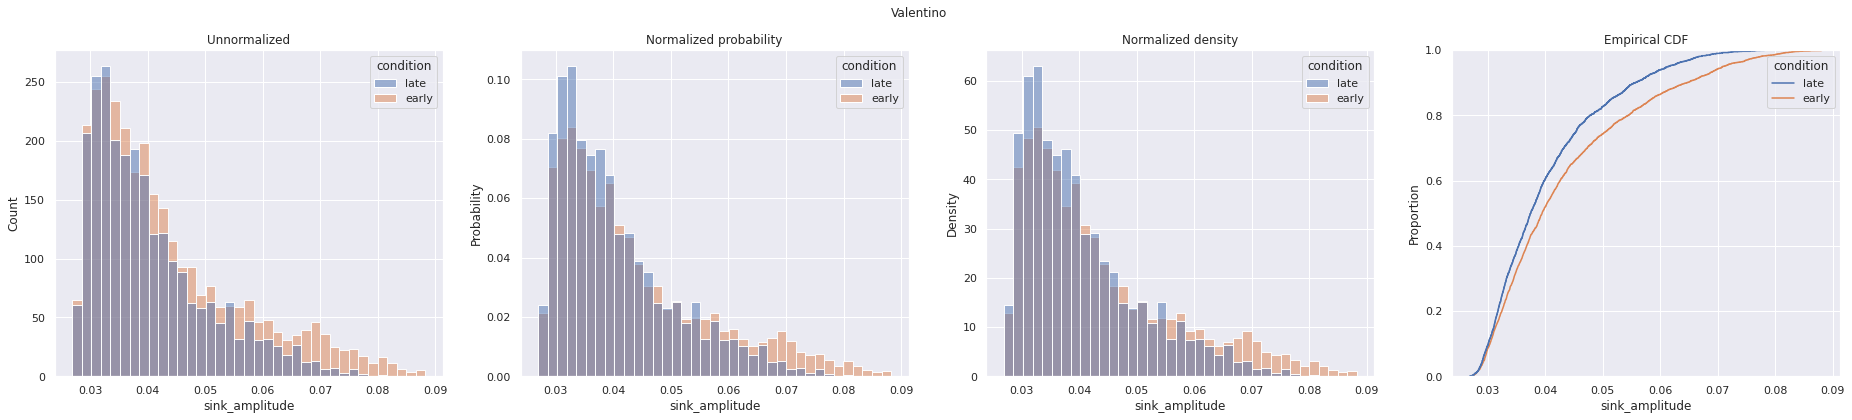

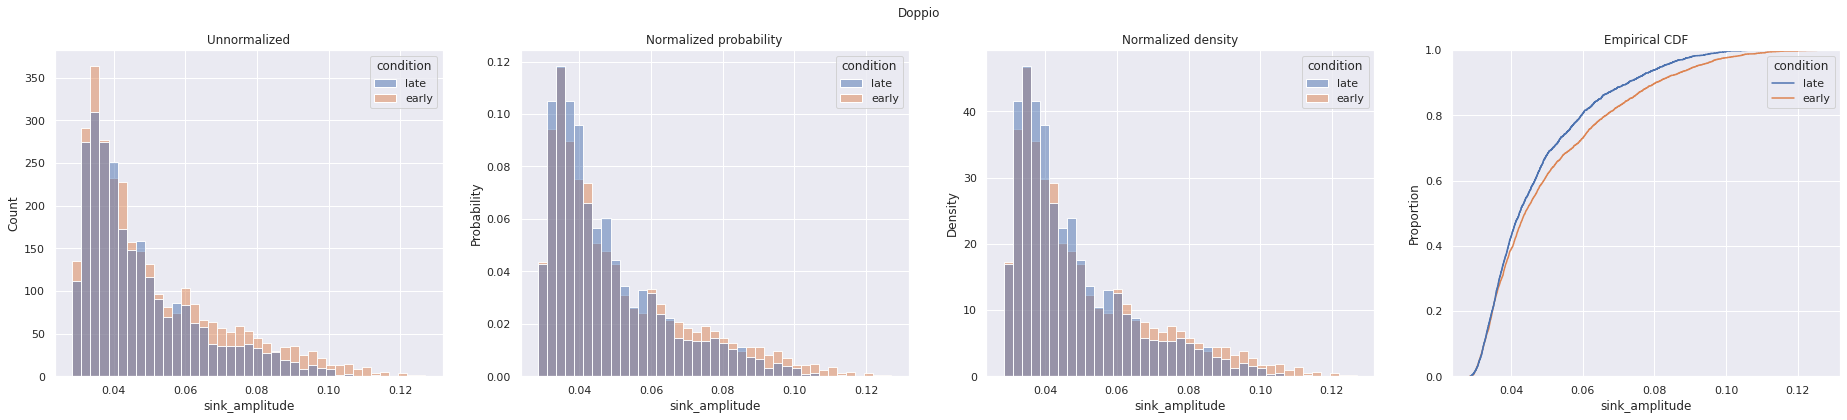

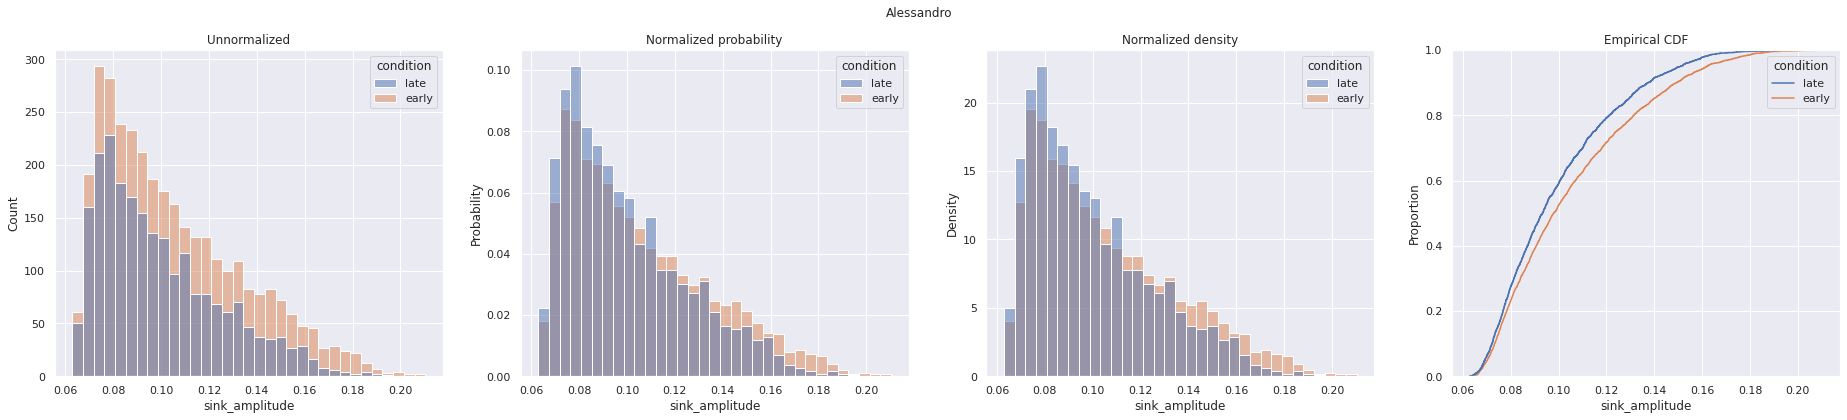

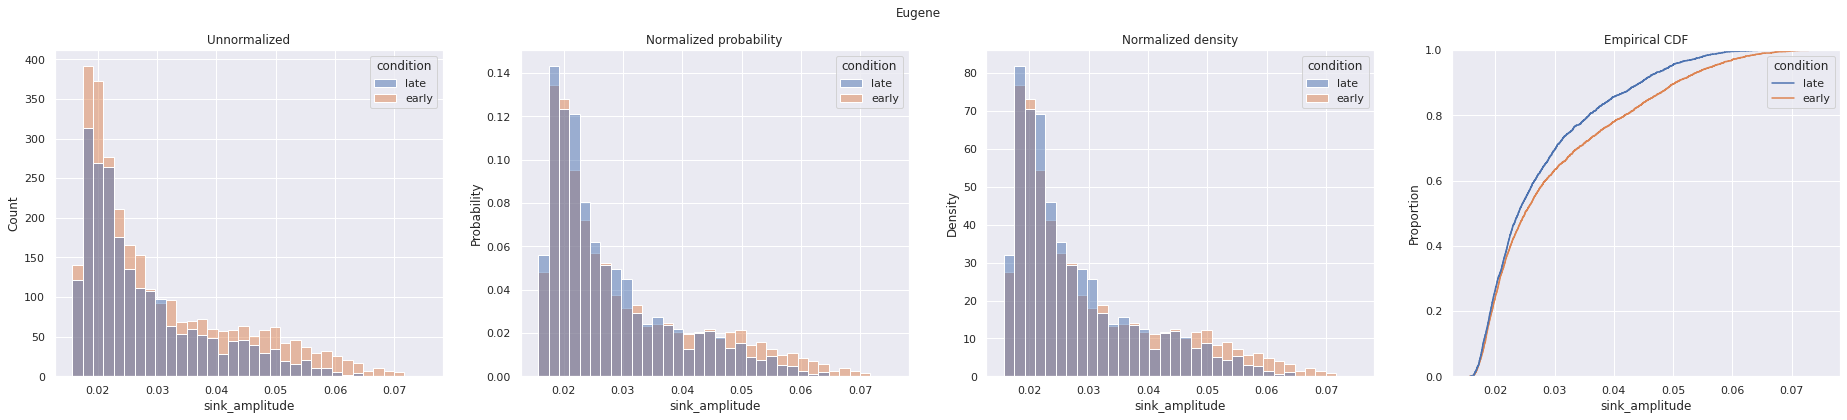

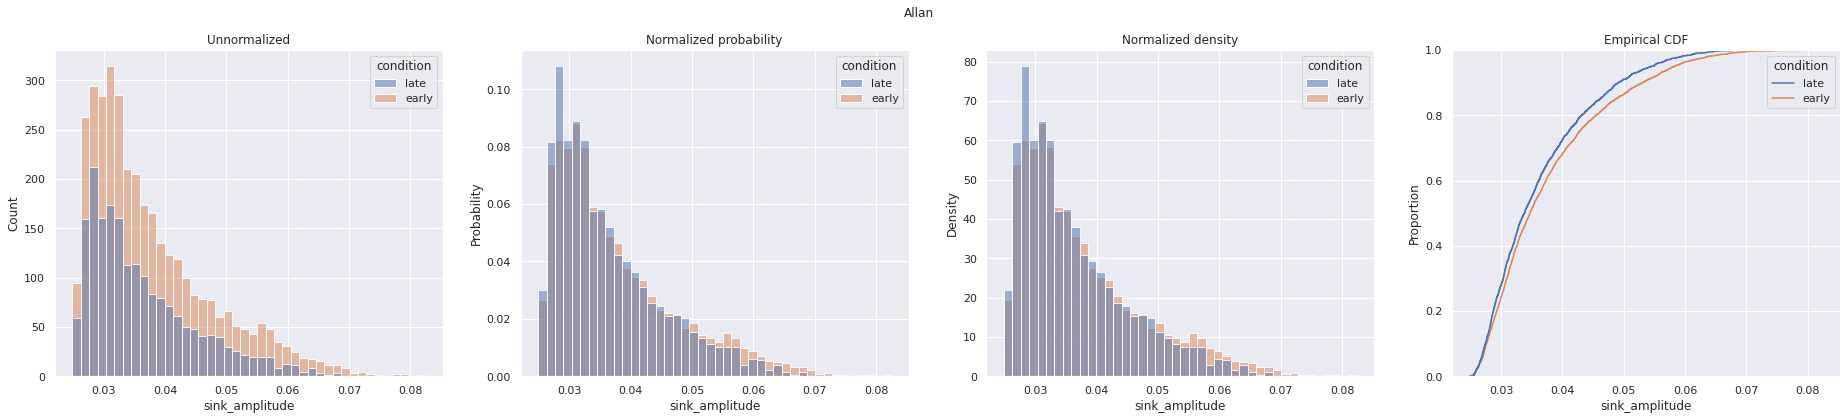

In [29]:
subjects = ["Segundo", "Valentino", "Doppio", "Alessandro", "Eugene", "Allan"]
col = 'sink_amplitude'
log_transform = False

subject_dfs = list()
for subject in subjects:
    early_hyp, early_spws = ea.load_early_recovery_nrem(subject, abs_sink=True)
    late_hyp, late_spws = ea.load_late_recovery_nrem(subject, abs_sink=True)
    
    df = pd.concat([late_spws[col], early_spws[col]], keys=['late', 'early'], names=['condition']).reset_index().drop(columns='spw_number')
    if log_transform:
        df[col] = np.log10(df[col])
        
    fig, axes = plt.subplots(1, 4, figsize=(32, 6))
    fig.suptitle(subject)
    sns.histplot(df, x=col, hue='condition', ax=axes[0])
    axes[0].set(title='Unnormalized')
    sns.histplot(df, x=col, hue='condition', stat='probability', common_norm=False, ax=axes[1])
    axes[1].set(title='Normalized probability')
    sns.histplot(df, x=col, hue='condition', stat='density', common_norm=False, ax=axes[2])
    axes[2].set(title='Normalized density')
    sns.ecdfplot(df, x=col, hue='condition', ax=axes[3])
    axes[3].set(title='Empirical CDF')
    
    subject_dfs.append(df)

In [30]:
from scipy import stats

df = pd.concat(subject_dfs, keys=subjects, names=['subject']).droplevel(1)
means = df.groupby(['subject', 'condition']).mean()
dom = means.xs((slice(None), 'early')) - means.xs((slice(None), 'late'))
res = stats.ttest_1samp(dom, 0)

print('Difference of means (early - late)')
print(dom.to_markdown())
print(res)

Difference of means (early - late)
| subject    |   sink_amplitude |
|:-----------|-----------------:|
| Alessandro |       0.00578788 |
| Allan      |       0.00139982 |
| Doppio     |       0.00321644 |
| Eugene     |       0.00242421 |
| Segundo    |       0.0022543  |
| Valentino  |       0.00322363 |
Ttest_1sampResult(statistic=array([4.97093668]), pvalue=array([0.00420837]))


In [31]:
df = pd.concat(subject_dfs, keys=subjects, names=['subject']).droplevel(1)
medians = df.groupby(['subject', 'condition']).median()
diff_medians = medians.xs((slice(None), 'early')) - medians.xs((slice(None), 'late'))

print('Difference of medians (early - late)')
print(diff_medians.to_markdown())
print(stats.ttest_1samp(diff_medians, 0))

Difference of medians (early - late)
| subject    |   sink_amplitude |
|:-----------|-----------------:|
| Alessandro |      0.00461481  |
| Allan      |      0.000890742 |
| Doppio     |      0.0016144   |
| Eugene     |      0.00112834  |
| Segundo    |      0.00167227  |
| Valentino  |      0.00198515  |
Ttest_1sampResult(statistic=array([3.60634178]), pvalue=array([0.01543976]))
